[Reference](https://towardsdev.com/k-nearest-neighbors-algorithm-a03e92970ac)

In [5]:
import numpy as np
from collections import Counter

In [1]:
class Knn:

    def __init__(self, k=5):
        self.k = k

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self.__repredict(x) for x in X]
        return np.array(y_pred)

    def __repredict(self,x):
        #distances
        distances = [self.calculate_euclidean_distance(x, x_train) for x_train in self.X_train]
        #sort
        k_idx = np.argsort(distances)[: self.k]
        #extract labels
        labels = [self.y_train[i] for i in k_idx]
        #vote
        common = Counter(labels).most_common(1)
        return common[0][0]

    def calculate_euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum(x1-x2)**2)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [7]:
model = Knn()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Manual Accuracy:", accuracy_score(y_test, y_pred))

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
Manual Accuracy: 0.9666666666666667


In [8]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Manual Accuracy:", accuracy_score(y_test, y_pred))

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
Manual Accuracy: 0.9666666666666667


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

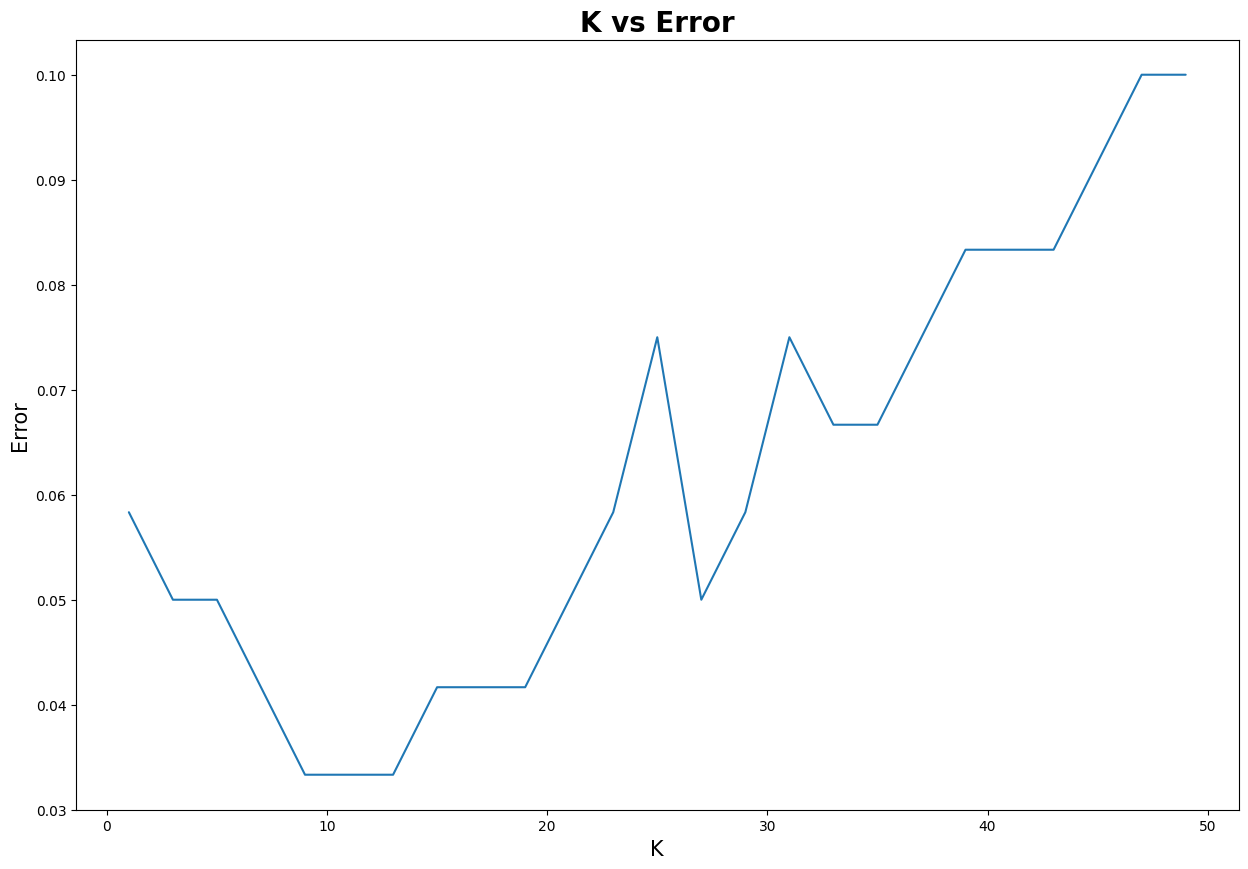

In [12]:
k_list = list(range(1,50,2))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('K vs Error', fontsize=20, fontweight='bold')
plt.xlabel('K', fontsize=15)
plt.ylabel('Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()